# 1. IMPORTING ALL NECESSARY LIBRARIES (WILL BE UPDATED)

In [141]:
import numpy as np 
import pandas as pd

# 2. DOWNLOADING DATA AND FIRST ANALYSIS

In [142]:

loan_train = pd.read_csv('loan-train.csv')
loan_test = pd.read_csv('loan-test.csv')
#it does work
####we will use df (data frame) instead of loan_train - less writing :)####
df = loan_train
df.head()
#it does work


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [143]:
rows = df.shape[0]
columns = df.shape[1]
print (f"The train set has {rows} rows and {columns} columns")

The train set has 614 rows and 13 columns


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### it is important to see that some of the values integer of float values, whereas the rest seems to be strings
## Even more important thing for us is the fact that despite the fact that there are 614 rows, some values are empty

# 3. Exploratory Data Analysis

In [145]:
missing_values_count = df.isnull().sum()
notmissing_values_count = df.notnull().sum()
print(missing_values_count)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


## While information such as gender or maritial status could or could not be vital, credit history of a person should be treated with utmost importance


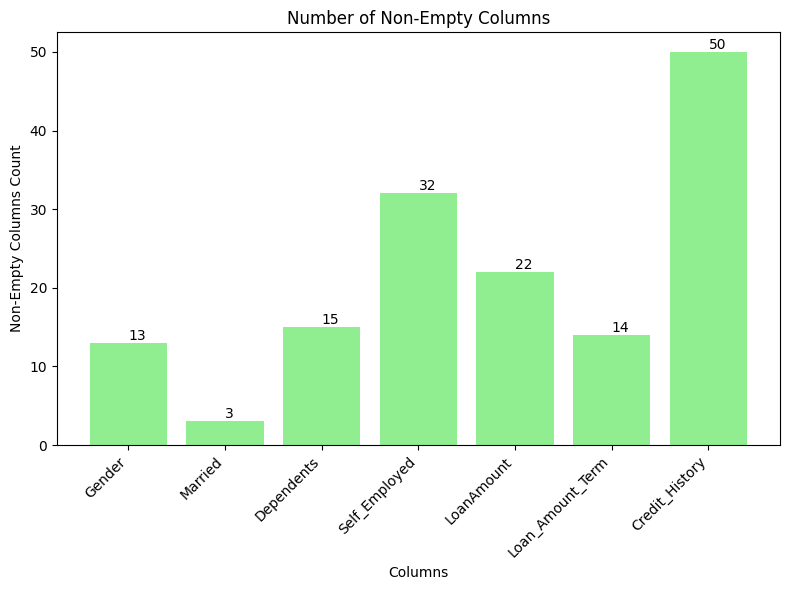

In [146]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
missing_values_count = missing_values_count[missing_values_count > 0]
bars = plt.bar(range(len(missing_values_count)), missing_values_count.values, color='lightgreen')

# Set the x-axis labels
plt.xticks(range(len(missing_values_count)), missing_values_count.index, rotation=45, ha='right')

# Add labels and title
plt.title('Number of Non-Empty Columns')
plt.xlabel('Columns')
plt.ylabel('Non-Empty Columns Count')

# Add counts above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.tight_layout()
plt.show()

### let us now analyze the content of each seperate column

## Loan_ID

In [147]:
df["Loan_ID"]

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

### this column does not have any empty spots, and consist of the integers indicating the code of a loan, this will not be useful for us

## Gender

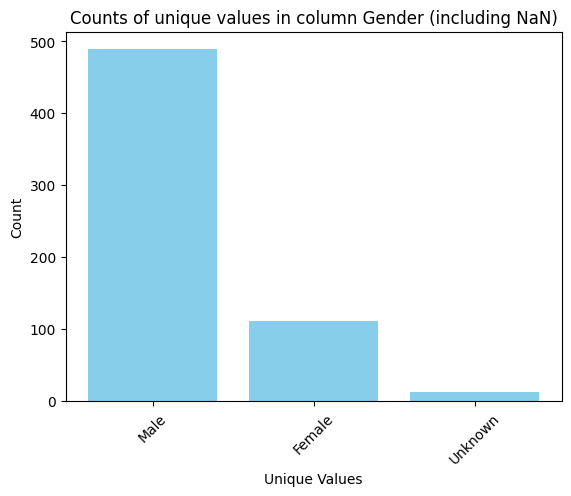

In [148]:
df["Gender"].fillna("Unknown", inplace=True)
value_counts = df["Gender"].value_counts(dropna=False)
# Plot the counts of unique values, including NaN
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.title(f'Counts of unique values in column {"Gender"} (including NaN)')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### The number of women is much smaller than number of men, so I believe assigning "Male" instead of "Unknown" will not hurt

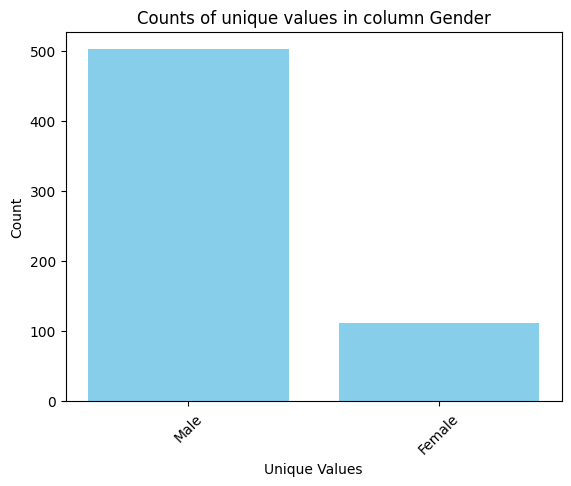

In [149]:
df['Gender'] = df['Gender'].replace("Unknown", "Male")
value_counts = df["Gender"].value_counts(dropna=False)
# Plot the counts of unique values, including NaN
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.title(f'Counts of unique values in column {"Gender"}')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Married

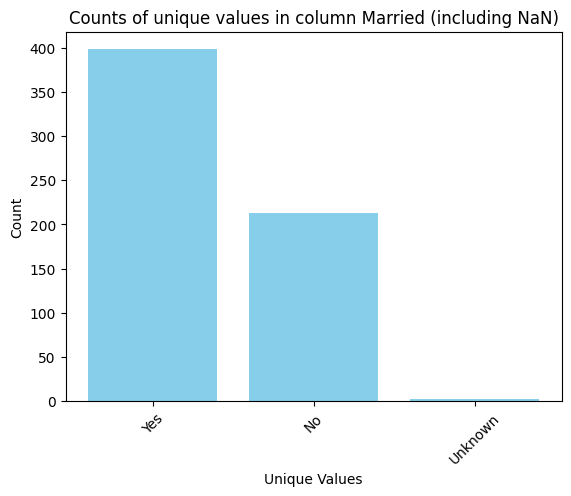

In [150]:
df["Married"].fillna("Unknown", inplace=True)
value_counts = df["Married"].value_counts(dropna=False)
# Plot the counts of unique values, including NaN
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.title(f'Counts of unique values in column {"Married"} (including NaN)')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

we can do the same trick as with gender, there are only 3 people with unknown maritial status, let us assume they are in a relationship

In [151]:
df['Married'] = df['Married'].replace("Unknown", "Yes")

### DEPENDENTS (Also, filling unknown values with the most often seen value (if the client did not mention the number of their dependents, it should be 0 either way))

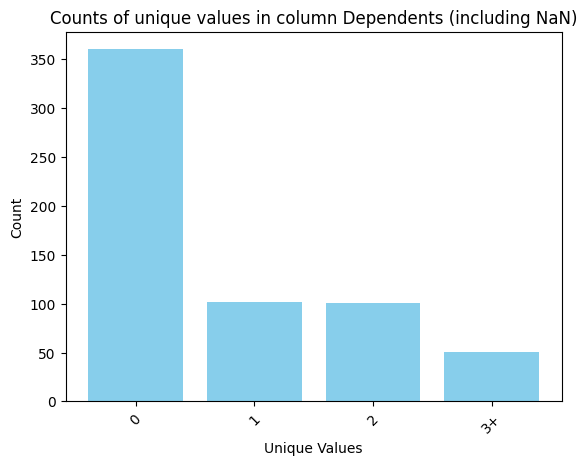

In [152]:
df["Dependents"].fillna('0', inplace=True)
value_counts = df["Dependents"].value_counts(dropna=False)
# Plot the counts of unique values, including NaN
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.title(f'Counts of unique values in column {"Dependents"} (including NaN)')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### EDUCATION (boolean value) - no empty values

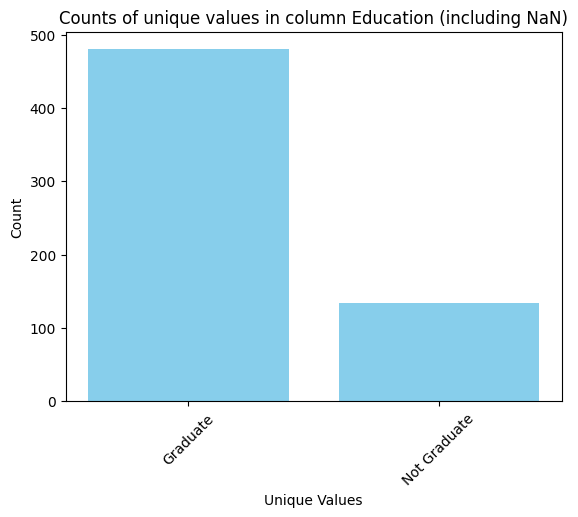

In [153]:

value_counts = df["Education"].value_counts(dropna=False)
# Plot the counts of unique values, including NaN
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.title(f'Counts of unique values in column {"Education"} (including NaN)')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Self_Employed (if the client did not mention they are self-employed, it would be a risk to assume so, we should assume they are not)

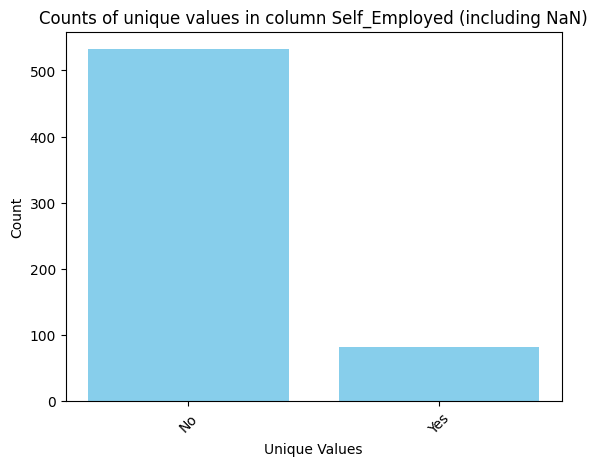

In [154]:
df["Self_Employed"].fillna('No', inplace=True)
value_counts = df["Self_Employed"].value_counts(dropna=False)
# Plot the counts of unique values, including NaN
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.title(f'Counts of unique values in column {"Self_Employed"} (including NaN)')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### ApplicantIncome

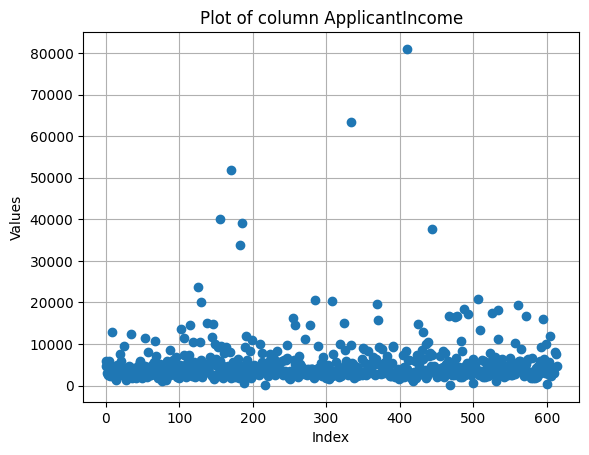

In [155]:
plt.plot(df.index, df["ApplicantIncome"], marker='o', linestyle='None')
plt.title(f'Plot of column {"ApplicantIncome"}')
plt.xlabel('Index')
plt.ylabel('Values')
plt.grid(True)
plt.show()


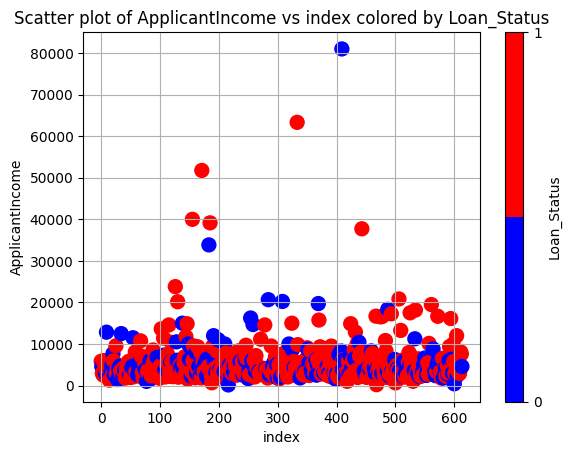

In [157]:
df["Loan_Status"] = df["Loan_Status"].replace({'Y': 1, 'N': 0})
from matplotlib.colors import ListedColormap
y_column = 'ApplicantIncome'
color_column = 'Loan_Status'

# Define colors for True and False values
colors = ['blue', 'red']  # For True and False respectively
color_map = ListedColormap(colors)

# Convert boolean values to integers (0 for False, 1 for True) for color mapping
df['color_code'] = df[color_column].astype(int)

# Plot the numerical values from the specified columns with colored dots
plt.scatter(df.index, df[y_column], c=df['color_code'], cmap=color_map, s=100)
plt.colorbar(ticks=[0, 1], label=color_column)
plt.title(f'Scatter plot of {y_column} vs index colored by {color_column}')
plt.xlabel("index")
plt.ylabel(y_column)
plt.grid(True)
plt.show()

# ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status